# Polynomial regression - overfitting and underfitting

Polynomial regression is a type of regression analysis where the relationship between the predictorand the response variable is modeled as an _n_ degree polynomial function. Instead of fitting a straight line to the data points like in linear regression, polynomial regression fits a curved line to the data points which enables more flexible models.


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

np.random.seed(42)
samples = 100 
X = np.random.uniform(-3,3, (samples,1))
f = lambda x: x**2 + 0.5*x + 3 
y = f(X) + np.random.randn(samples,1) # adds an epsilon standard normally distributed

f(X).shape, X.shape

((100, 1), (100, 1))

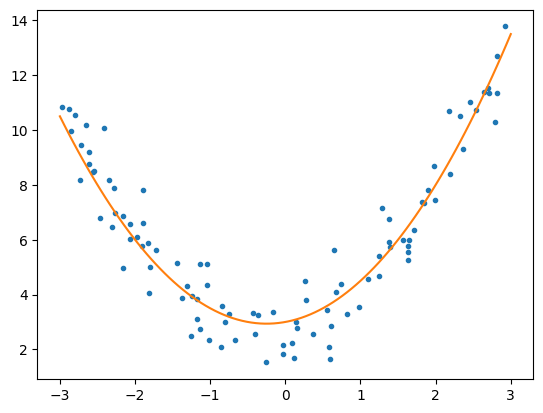

In [2]:
x = np.linspace(-3,3,100).reshape(100,1)

plt.plot(X, y, '.')
plt.plot(x, f(x))


Compared to linear regression, polynomial regression can better capture nonlinear relationships between the independent and dependent variables. This is because it allows for the curve to bend and twist to fit the data points more closely.

<AxesSubplot: title={'center': '$y = x^2+0.5x+3+\\epsilon$'}, xlabel='x', ylabel='y'>

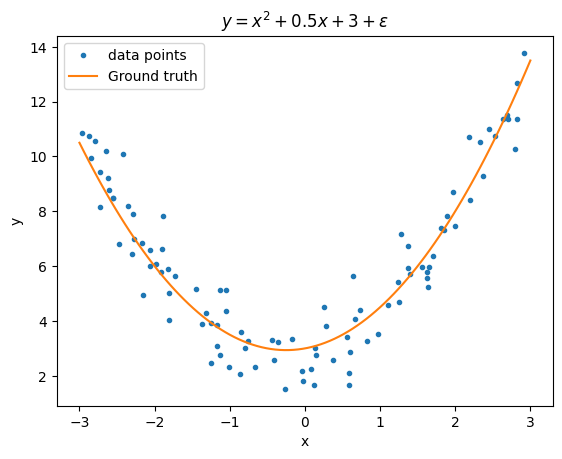

In [3]:
def draw_data():
    fig, ax = plt.figure(), plt.axes()
    ax.plot(X, y, ".", label="data points")
    x = np.linspace(-3, 3, samples).reshape(-1, 1)
    ax.plot(x, f(x), label="Ground truth")
    ax.set(title=r"$y = x^2+0.5x+3+\epsilon$", xlabel="x", ylabel="y")
    ax.legend()

    return ax


draw_data()


## Polynomial regression

### Feature engineering

- constructed features artificially

In [4]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_instance = PolynomialFeatures(degree=2, include_bias=False) # TODO: check why I chose not to include bias

polynomial_features = polynomial_instance.fit_transform(X)
polynomial_features[:5], X[:5], .75**2, 2.7**2

(array([[-0.75275929,  0.56664654],
        [ 2.70428584,  7.3131619 ],
        [ 1.39196365,  1.93756281],
        [ 0.59195091,  0.35040587],
        [-2.06388816,  4.25963433]]),
 array([[-0.75275929],
        [ 2.70428584],
        [ 1.39196365],
        [ 0.59195091],
        [-2.06388816]]),
 0.5625,
 7.290000000000001)

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(polynomial_features, y) # trained the model
model.coef_ # beta_1, beta_2

array([[0.43366893, 1.06456263]])

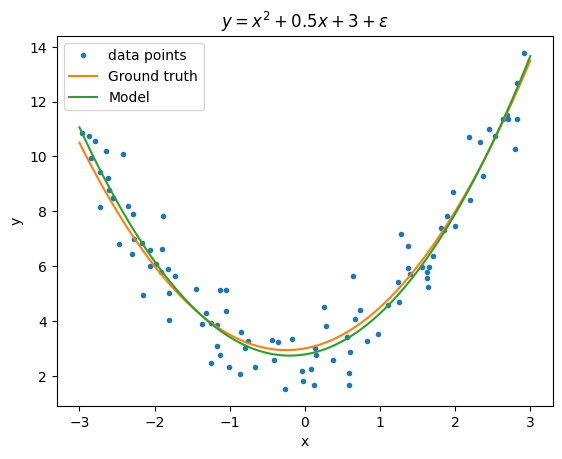

In [6]:
x = np.linspace(-3,3, samples).reshape(-1,1) # test data in this case
x_polynomial_features = polynomial_instance.transform(x)

y_pred = model.predict(x_polynomial_features)

ax = draw_data()
ax.plot(x, y_pred, label="Model")
ax.legend()

## Underfitting

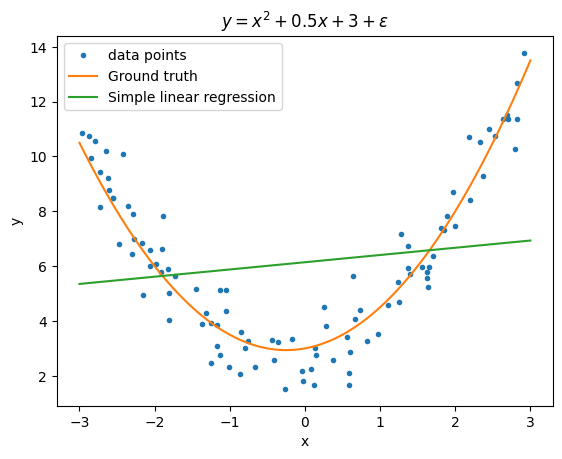

In [7]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(x)

ax = draw_data()
ax.plot(x, y_pred, label = "Simple linear regression")
ax.legend();

An underfit model is characterized by high bias and low variance, which means that it makes significant errors on both the training and test datasets, and is not able to capture the complexity of the problem.

## Overfitting

X_features.shape=(100, 30)


[Text(0.5, 1.0, 'Overfitted, the model is too complex'), (-5.0, 15.0)]

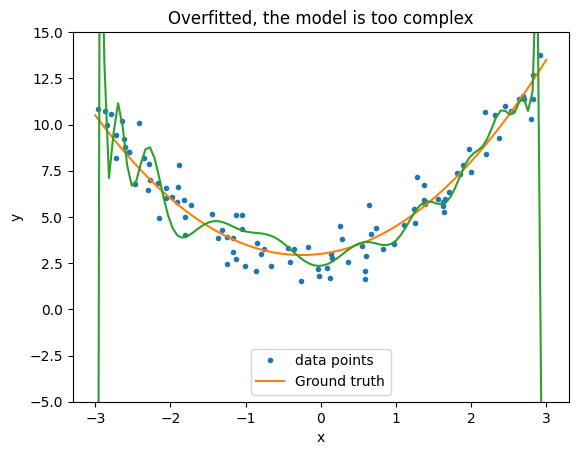

In [8]:
polynomial_instance = PolynomialFeatures(30, include_bias=False)
X_features = polynomial_instance.fit_transform(X)

print(f"{X_features.shape=}")

model = LinearRegression()
model.fit(X_features, y)

x_polynomial_features = polynomial_instance.transform(x)

y_pred = model.predict(x_polynomial_features)

ax = draw_data()
ax.plot(x, y_pred)
ax.set(title = "Overfitted, the model is too complex", ylim = [-5,15])
# can't generalize well

Polynomial regression can lead to overfitting if the degree of the polynomial is too high for the amount of data available. This can cause the model to fit the noise in the data rather than the underlying signal, leading to poor performance on new, unseen data. Linear regression, on the other hand, is generally less prone to overfitting because it is a simpler model with fewer parameters to estimate.

## Choose a model

In [9]:
np.random.seed(42)


samples = 10000
X = np.random.uniform(-3, 3, (samples, 1))
f = lambda x: x ** 4 + x ** 2 + 0.5 * x + 3
y = f(X) + np.random.randn(samples, 1)

X.shape, y.shape

((10000, 1), (10000, 1))

## Train|val|test split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((6700, 1), (1650, 1), (1650, 1), (6700, 1), (1650, 1), (1650, 1))

## Elbow 

The elbow method involves plotting the average distance between the data points and their central tendency (cluster centroid) as a function of the number of clusters, and then identifying the "elbow" in the plot, which corresponds to the point where the rate of improvement starts to slow down.

In [11]:
from sklearn.metrics import mean_squared_error

RMSE_val = []

for degree in range(1,100):
    model_poly = PolynomialFeatures(degree, include_bias=False)
    train_features = model_poly.fit_transform(X_train) # feature engineering on train data
    val_features = model_poly.transform(X_val) # feature engineering on validation data
    model_linear_regression = LinearRegression()

    model_linear_regression.fit(train_features, y_train)

    y_pred_val = model_linear_regression.predict(val_features)

    RMSE_val.append(np.sqrt(mean_squared_error(y_val, y_pred_val)))

Text(0.5, 1.0, 'RMSE on validation data for different degrees of polynomial')

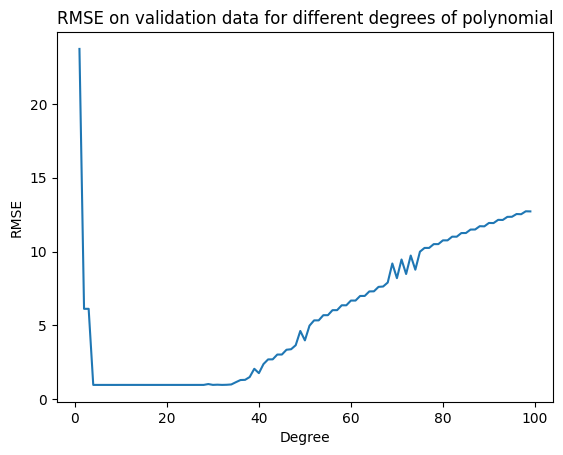

In [12]:
plt.plot(range(1,100), RMSE_val)
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("RMSE on validation data for different degrees of polynomial")

Text(0.5, 1.0, 'RMSE on validation data for different degrees of polynomial')

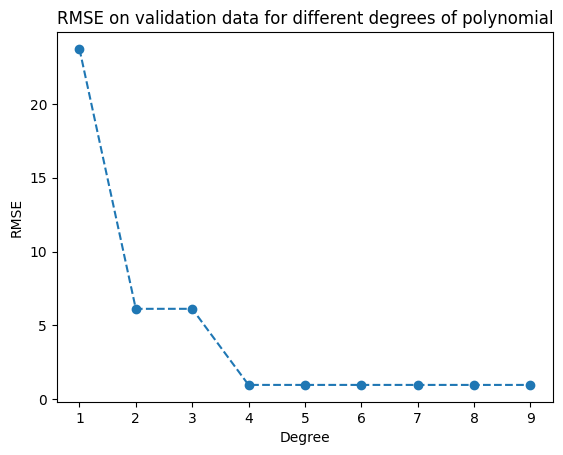

In [13]:
plt.plot(range(1,10), RMSE_val[:9], 'o--')
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("RMSE on validation data for different degrees of polynomial")
